In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [14]:
# Load dữ liệu MNIST
# 60000 dữ liệu ở training set và 10000 dữ liệu ở test set , chia 50000 dữ liệu cho training set và 10000 dữ liệu cho validation set, giữ nguyên 10000 dữ liệu của test set
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)

(50000, 28, 28)


In [15]:
# Reshape lại dữ liệu 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One-hot encoding label (Y)
Y_train = to_categorical(y_train, 10)
Y_val = to_categorical(y_val, 10)
Y_test = to_categorical(y_test, 10)

print("Dữ liệu ban đầu: ", y_train[0])
print("Dữ liệu sau khi one-hot encoding: ", Y_train[0])

Dữ liệu ban đầu:  5
Dữ liệu sau khi one-hot encoding:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [17]:
# 5. Định nghĩa model
model = Sequential()

# Thêm convolutional layer với 32 kernel, kích thước kernel 3*3
# Dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'sigmoid', input_shape = (28, 28, 1)))

# Thêm convolutional layer
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'sigmoid'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten layer để chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation = 'sigmoid'))

# Output layer với 10 nodes và dùng hàm softmax
model.add(Dense(10, activation = 'softmax'))

# 6. Compile model, chỉ rõ hàm loss function nào được sử dụng, phương thức dùng để tối ưu hàm loss function
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), batch_size = 32, epochs = 10 , verbose = 1)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8257 - loss: 0.5848 - val_accuracy: 0.9806 - val_loss: 0.0712
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9836 - loss: 0.0593 - val_accuracy: 0.9864 - val_loss: 0.0479
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9904 - loss: 0.0352 - val_accuracy: 0.9859 - val_loss: 0.0495
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9938 - loss: 0.0231 - val_accuracy: 0.9870 - val_loss: 0.0455
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9954 - loss: 0.0166 - val_accuracy: 0.9882 - val_loss: 0.0386
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9980 - loss: 0.0092 - val_accuracy: 0.9905 - val_loss: 0.0356
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9987 - loss: 0.0059 - val_accuracy: 0.9880 - val_loss: 0.0408
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9987 -

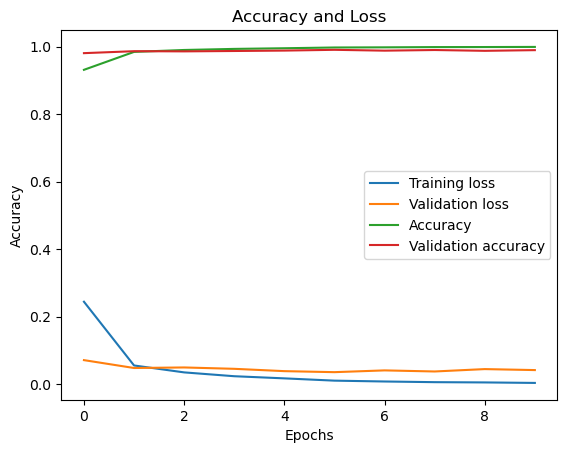

In [18]:
# 8. Vẽ đồ thị loss, accuracy của training set và validation set
fig = plt.figure()
numOfepochs = 10
plt.plot(np.arange(0, numOfepochs), H.history['loss'], label = 'Training loss')
plt.plot(np.arange(0, numOfepochs), H.history['val_loss'], label = 'Validation loss')
plt.plot(np.arange(0, numOfepochs), H.history['accuracy'], label = 'Accuracy')
plt.plot(np.arange(0, numOfepochs), H.history['val_accuracy'], label = 'Validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [20]:
# 9. Đánh giá dữ model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03337867558002472, 0.989799976348877]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Giá trị dự đoán:  5


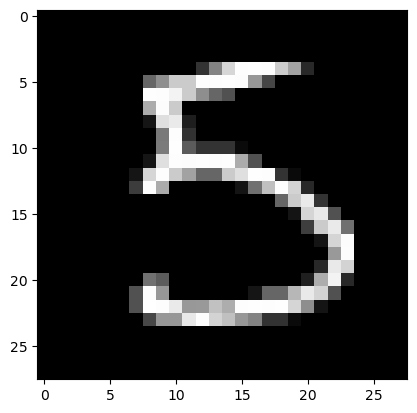

In [32]:
# 10. Dự đoán ảnh
plt.imshow(X_test[15].reshape(28, 28), cmap = 'gray')

y_predict = model.predict(X_test[15].reshape(1, 28, 28))
print('Giá trị dự đoán: ', np.argmax(y_predict))